# Generalized Fisherface Parameter Evaluation ($\alpha, \beta$)

## Set up

In [1]:
import numpy as np
import sklearn.pipeline
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
# load data
import sklearn.datasets
from sklearn.model_selection import train_test_split


lfw_people = sklearn.datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target


print("Total dataset size:")
print("n_samples: ",  n_samples)
print("n_features: ", n_features)
print("n_classes: ", n_classes)

Total dataset size:
n_samples:  1288
n_features:  1850
n_classes:  7


In [3]:
def create_data_split(X, y, test_size=0.2, random_state=None):
    '''creates a train-test split and performs preprocessing'''

    # split into a training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # first, scale the data
    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_trfm = scaler.transform(X_train)
    X_test_trfm = scaler.transform(X_test)

    return X_train_trfm, X_test_trfm, y_train, y_test

In [4]:
def plot_faces(faces, n_cols=3, figsize=(8,6), h=h, w=w):

    dim, n_faces = faces.shape
    n_rows = n_faces // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(faces[:, i].reshape(h,w))

    return fig, ax

In [5]:
from generalized_fisher_ld import GeneralizedFisherLD

## Parameter Evaluation

Here, we evaluate the model on different choices for the parameters $(\alpha, \beta)$ along the line $\alpha=\beta$

In [6]:
num_alpha_beta = 51 # number of values for alpha=beta to test. control the resolution of the 'alpha=beta axis'
num_trials = 100 # the number of trials (with different data splits) to try on each value of alpha=beta

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier # the classifier to use in the model
classifier_params = {'n_neighbors': 3} # the parameters to pass into the classifier

In [7]:
alpha_betas = np.linspace(0,1, num=num_alpha_beta)

train_accs = np.zeros(shape=(num_alpha_beta, num_trials))
test_accs = np.zeros(shape=(num_alpha_beta, num_trials))

In [8]:
from tqdm.notebook import tqdm, trange


# skip first because fisherface requires initial pca
for i, alpha_beta in enumerate(tqdm(alpha_betas, desc='alpha_beta')):
    alpha = beta = alpha_beta

    for trial in trange(num_trials, desc='trial', leave=False):

        # create data split
        X_train_trfm, X_test_trfm, y_train, y_test = create_data_split(X, y, test_size=0.2)

        n_samples_train = len(X_train_trfm)
        n_classes = len(np.unique(y_train))

        # train model

        # if alpha=beta=0 (standard fisherface, need to do pca first)
        if alpha == beta == 0: 
            fld_clf = sklearn.pipeline.Pipeline(steps=[('pca', PCA(n_components = n_samples_train - n_classes)),
                                            ('gfld', GeneralizedFisherLD(n_components=n_classes - 1, alpha=0, beta=0)),
                                            ('clf', classifier(**classifier_params))])

            fld_clf.fit(X_train_trfm, y_train)

        else:
            fld_clf = sklearn.pipeline.Pipeline(steps=[('gfld', GeneralizedFisherLD(n_components=n_classes - 1, 
                                                                                    alpha=alpha, beta=beta)),
                                                    ('clf', classifier(**classifier_params))])

            fld_clf.fit(X_train_trfm, y_train)

        # log the accuracies
        train_accs[i, trial] = fld_clf.score(X_train_trfm, y_train)
        test_accs[i, trial] = fld_clf.score(X_test_trfm, y_test)

alpha_beta:   0%|          | 0/51 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

trial:   0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
test_acc_avg = np.mean(test_accs, axis=1)
test_acc_std = np.std(test_accs, axis=1)

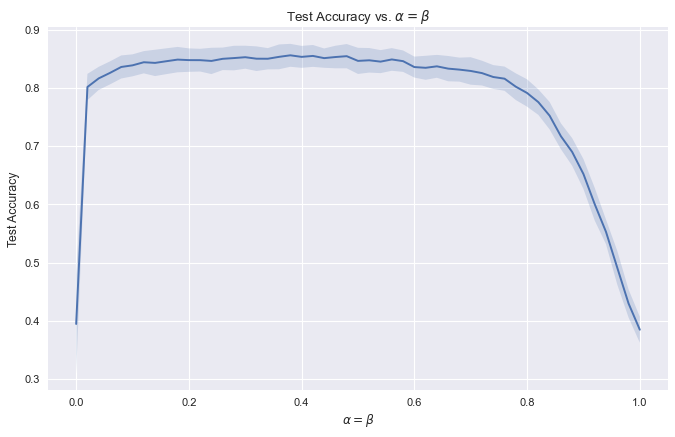

In [10]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,6), dpi=80);
ax.plot(alpha_betas, test_acc_avg); # line of avg test axx 
ax.fill_between(alpha_betas, test_acc_avg - test_acc_std, test_acc_avg + test_acc_std, alpha=0.2) # estimate of error

ax.set_title('Test Accuracy vs. $\\alpha = \\beta$');
ax.set_xlabel('$\\alpha=\\beta$');
ax.set_ylabel('Test Accuracy');